In [31]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns 


conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Churn;"
    "Trusted_Connection=yes;"
)
df = pd.read_sql("SELECT * FROM dbo.v_churn;",conn)


C:\Users\DarkR\AppData\Local\Temp\ipykernel_5324\786106608.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM dbo.v_churn;",conn)


In [32]:
print("Shape:")
print(df.shape)
print("----------------------------------------")

print("Info:")
df.info()
print("----------------------------------------")

print("Summary Statistics:")
print(df.describe())
print("----------------------------------------")

print("Churn Distribution:")
print(df["Churn"].value_counts())
print("\nChurn Percentage:")
print(df["Churn"].value_counts(normalize=True) * 100)


Shape:
(3333, 12)
----------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   bool   
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   bool   
 3   DataPlan         3333 non-null   bool   
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
 11  tenure_band      3333 non-null   object 
dtypes: bool(3), float64(5), int64(3), object(1)
memory usage: 244.2+ KB
----------------------------------------
Summary Statistics:
       AccountWeeks    DataUsage  CustServCalls   

In [33]:
comparison = df.groupby("Churn")[["MonthlyCharge",
                                  "DataUsage",
                                  "CustServCalls",
                                  "DayMins"]].mean()

print("Average Metrics by Churn:\n")
print(comparison)


Average Metrics by Churn:

       MonthlyCharge  DataUsage  CustServCalls     DayMins
Churn                                                     
False      55.816246   0.862151       1.449825  175.175754
True       59.190062   0.546957       2.229814  206.914078


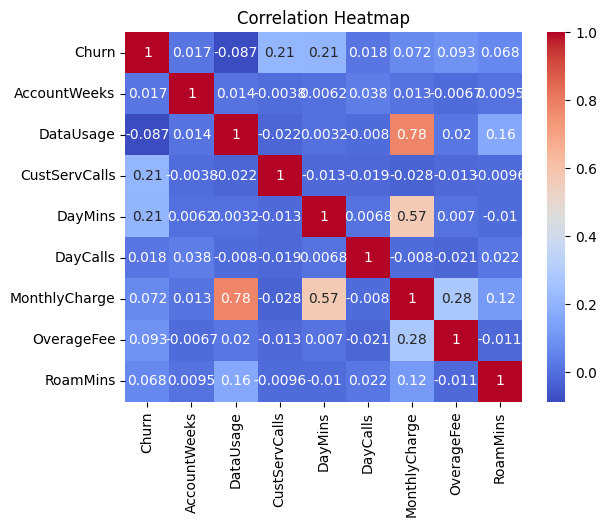

In [41]:
# 1) make sure churn is numeric
df["Churn"] = df["Churn"].astype(int)

# 2) keep only numeric columns explicitly
num_df = df.select_dtypes(include=["number"])

# 3) correlation + heatmap
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

